# EDA

In [126]:
import os
import numpy 

folder_path = "contrails_project/train"
folder_names = os.listdir(folder_path)

# Sort the folder names numerically
folder_names = sorted(folder_names, key=lambda x: int(x))

first_five_folders = folder_names[:5]

print("First 5 folder names:")
for folder_name in first_five_folders:
    print(folder_name)


First 5 folder names:
195731008142151
1108741208571075
2021697809379172
2272114987607527
2531027206766669


In [16]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 23.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [18]:
!apt-get update
!apt-get install -y libgl1-mesa-glx

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian buster/main amd64 Packages [7909 kB]
Get:5 http://security.debian.org/debian-security buster/updates/main amd64 Packages [508 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8788 B]
Fetched 8639 kB in 2s (4230 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libelf1 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0
  libglx0 libllvm7 libpciaccess0 libsensors-config libsensors5 libx11-xcb1
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-sync1
  libxdamage1 libxfixes3 lib

In [127]:
!source myenv/bin/activate

In [12]:
import sys
print(sys.version)

3.7.10 (default, Jun  4 2021, 14:48:32) 
[GCC 7.5.0]


In [13]:
!pip install tensorflow==2.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 MB 2.0 MB/s eta 0:00:0000:0100:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 34.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 41.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 29.2 MB/s eta 0:00:0000:01:00:01
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.4/462.4 kB 8.8 MB/s eta 0:00

In [128]:
import numpy as np 
from path import Path
import os
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
from matplotlib import animation
import datetime

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import layers, models
from tensorflow.keras.losses import binary_crossentropy
import cv2


print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.5.0


In [188]:
import os
from pathlib import Path

BASE_DIR = Path("contrails_project")

train_list = os.listdir(BASE_DIR / "train")
val_list = os.listdir(BASE_DIR / "validation")
test_list = os.listdir(BASE_DIR / "test")

print(f"Number of training examples: {len(train_list)}")
print(f"Number of validation examples: {len(val_list)}")
print(f"Number of test examples: {len(test_list)}")

Number of training examples: 20529
Number of validation examples: 1856
Number of test examples: 2


In [189]:
train_metadata = pd.read_json(BASE_DIR / "train_metadata.json")
val_metadata = pd.read_json(BASE_DIR / "validation_metadata.json")

train_metadata.head()

,record_id,projection_wkt,row_min,row_size,col_min,col_size,timestamp
0,3283699311323360256,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",1686563.50,-1960.975830,371650.9375,1947.130737,2019-10-13 23:20:00
1,8563667897034605568,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",3182392.75,-1977.611084,360291.8125,1938.791138,2019-08-21 08:40:00
2,6375533009500587008,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",2702499.50,-2035.440063,830456.9375,1890.603882,2019-10-04 20:40:00
3,3029407526724838912,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",2689881.50,-1998.106812,565498.7500,1918.643677,2019-10-07 00:00:00
4,4486503791474809856,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",4179394.25,-2073.804688,736862.0000,1853.664795,2019-10-29 16:30:00


In [186]:
train_metadata.projection_wkt.iloc[0]

'PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-51],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [192]:
import pandas as pd
import re

# Load the train_metadata DataFrame
train_metadata = pd.read_json(BASE_DIR / "train_metadata.json")

# Define a function to extract variables from the projection WKT
def extract_projection_variables(wkt):
    variables = {}
    # Extract variables using regular expressions
    central_meridian = re.findall(r'PARAMETER\["central_meridian",([+-]?\d+(?:\.\d+)?)\]', wkt)
    variables['Central Meridian'] = float(central_meridian[0]) if central_meridian else None

    # Extract other variables as needed
    latitude_of_origin = re.findall(r'PARAMETER\["latitude_of_origin",([+-]?\d+(?:\.\d+)?)\]', wkt)
    variables['Latitude of Origin'] = float(latitude_of_origin[0]) if latitude_of_origin else None

    scale_factor = re.findall(r'PARAMETER\["scale_factor",([+-]?\d+(?:\.\d+)?)\]', wkt)
    variables['Scale Factor'] = float(scale_factor[0]) if scale_factor else None

    false_easting = re.findall(r'PARAMETER\["false_easting",([+-]?\d+(?:\.\d+)?)\]', wkt)
    variables['False Easting'] = float(false_easting[0]) if false_easting else None

    false_northing = re.findall(r'PARAMETER\["false_northing",([+-]?\d+(?:\.\d+)?)\]', wkt)
    variables['False Northing'] = float(false_northing[0]) if false_northing else None

    # Extract other variables as needed

    return pd.Series(variables)

# Extract variables from the projection WKT
train_metadata[['Central Meridian', 'Latitude of Origin', 'Scale Factor', 'False Easting', 'False Northing']] = train_metadata['projection_wkt'].apply(extract_projection_variables)

# Print the updated train_metadata DataFrame
print(train_metadata)


                 record_id                                     projection_wkt  \
0      3283699311323360256  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   
1      8563667897034605568  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   
2      6375533009500587008  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   
3      3029407526724838912  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   
4      4486503791474809856  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   
...                    ...                                                ...   
20524  2784921205987946496  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   
20525  9072953982653736960  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   
20526  2998013562139868160  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   
20527  8070893861055857664  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   
20528  1609423943725151232  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1...   

           row_min     row_

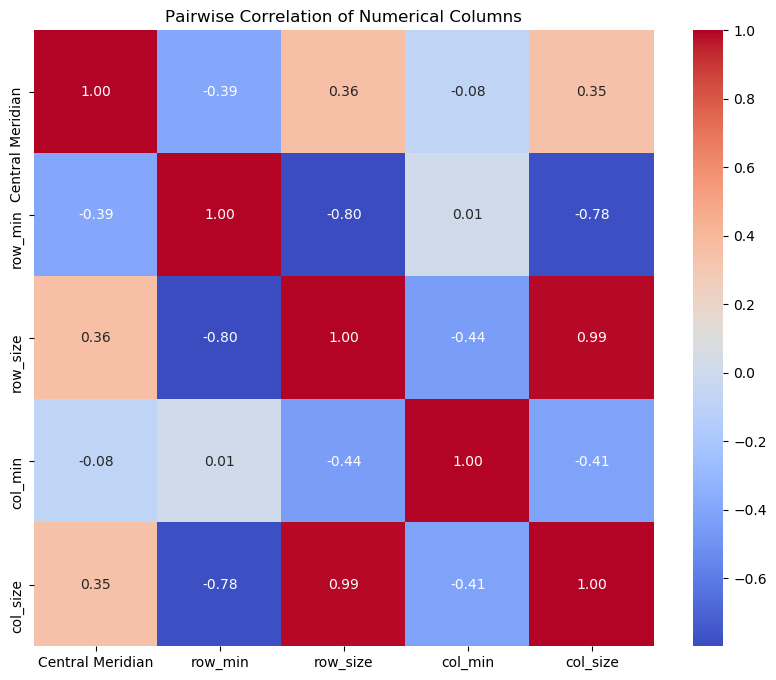

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select the numerical columns of interest
numerical_columns = ['Central Meridian', 'row_min', 'row_size', 'col_min', 'col_size']

# Subset the DataFrame with the numerical columns
numerical_data = train_metadata[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation of Numerical Columns')
plt.show()

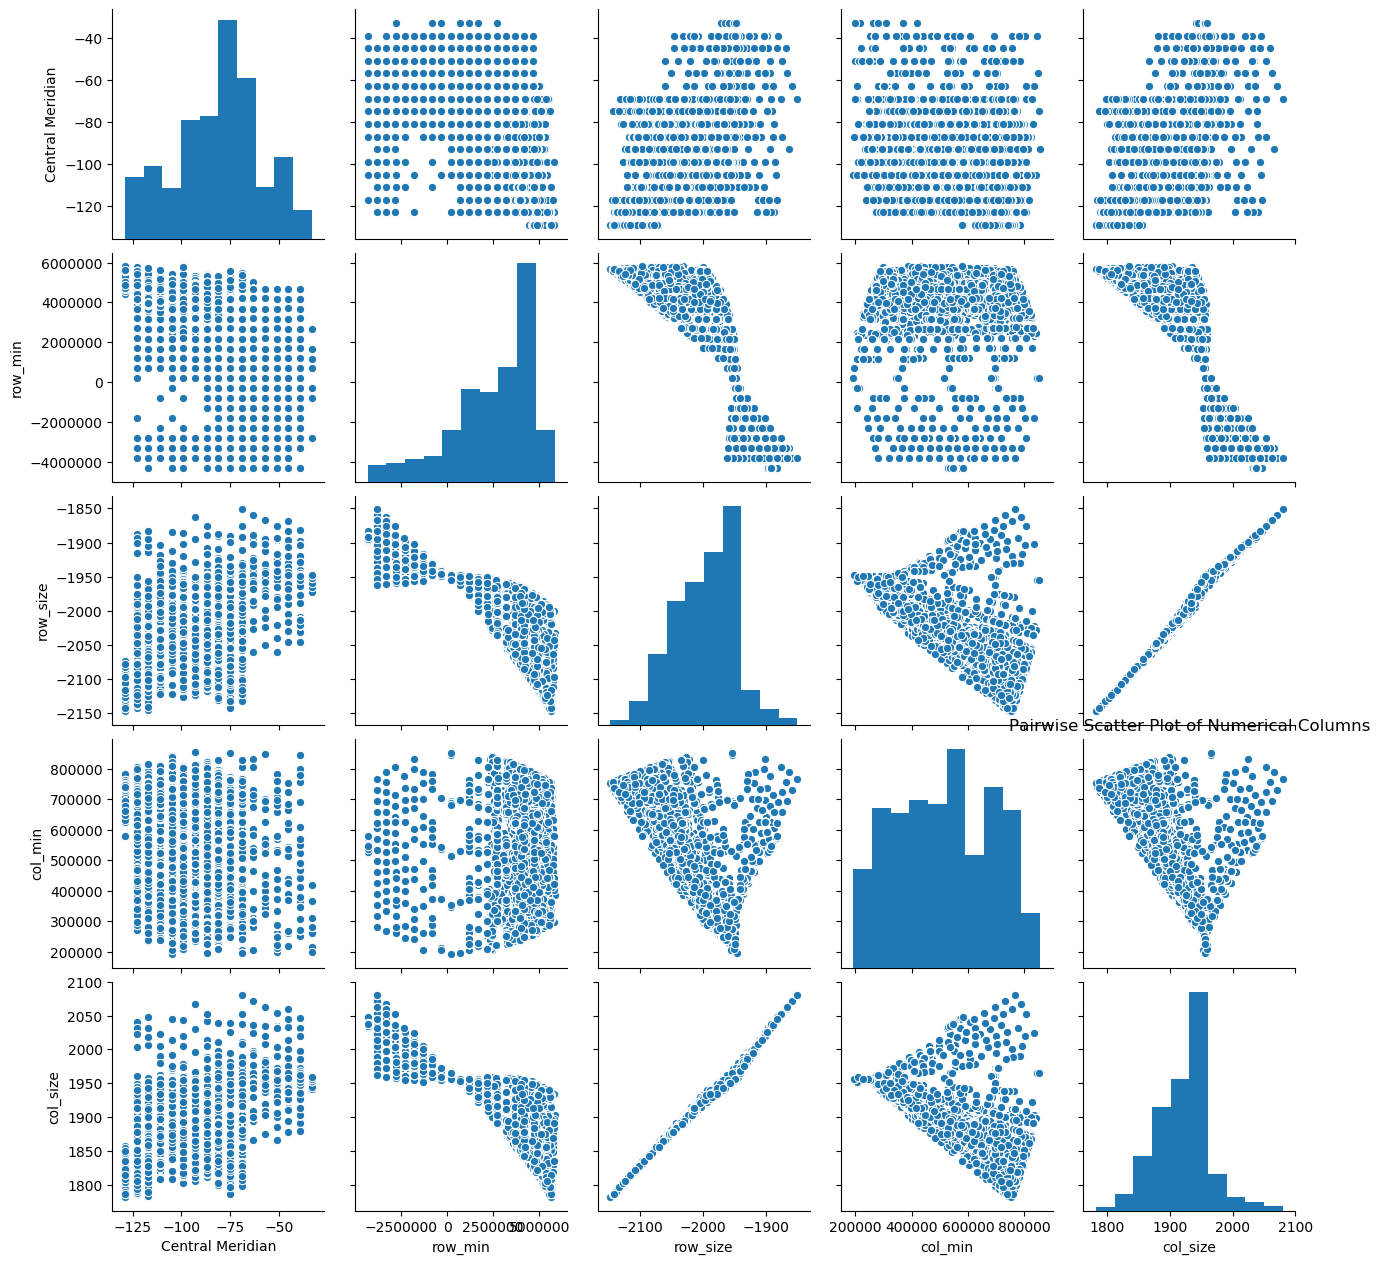

In [194]:
sns.pairplot(numerical_data)
plt.title('Pairwise Scatter Plot of Numerical Columns')
plt.show()

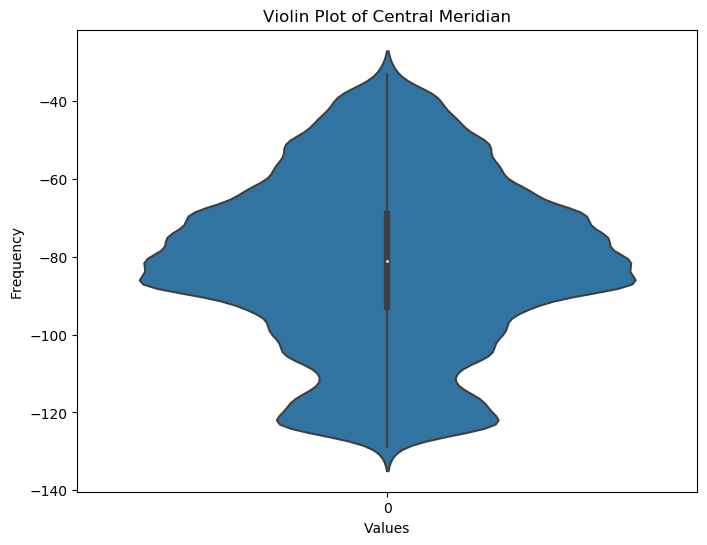

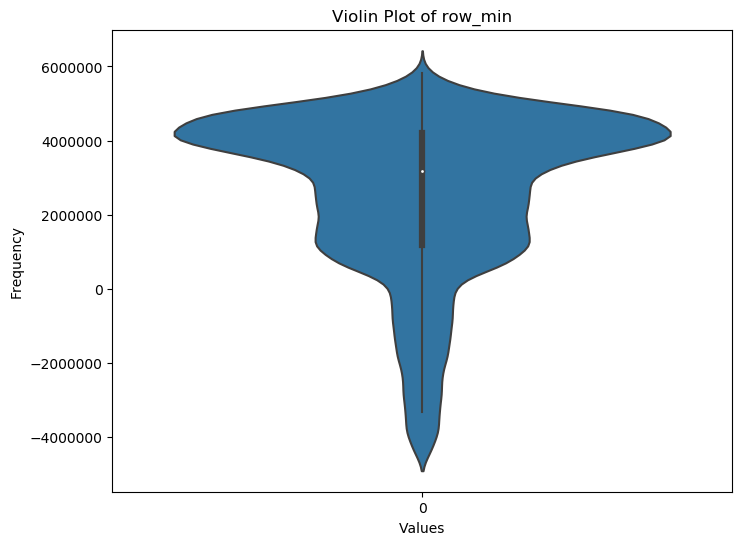

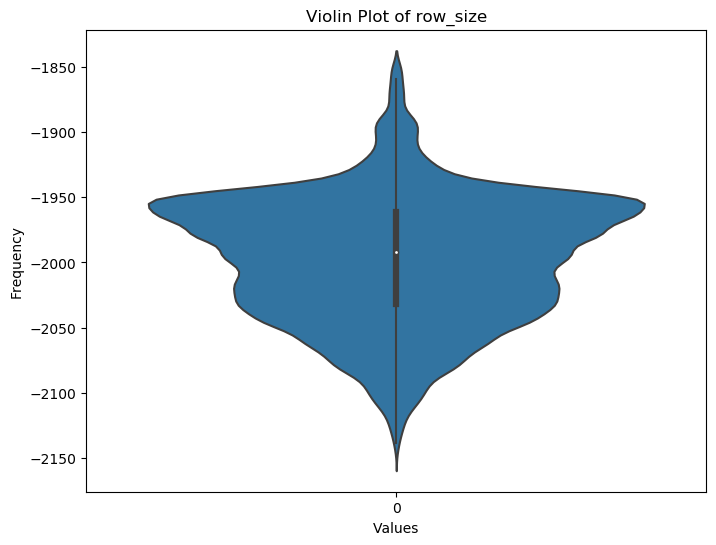

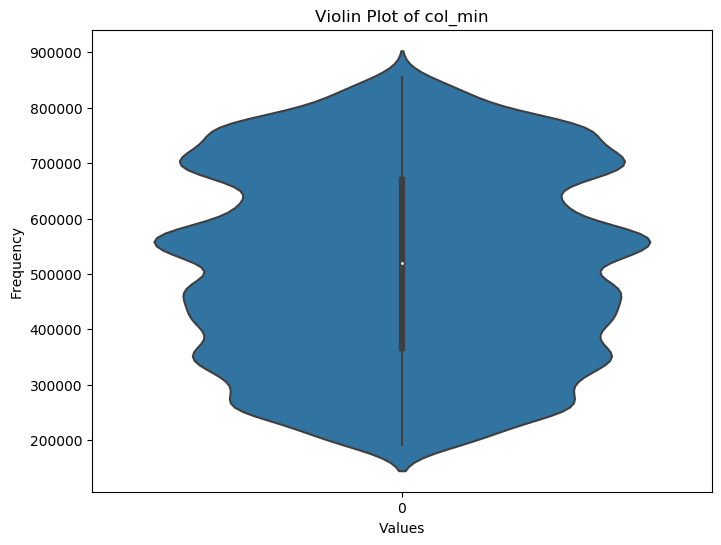

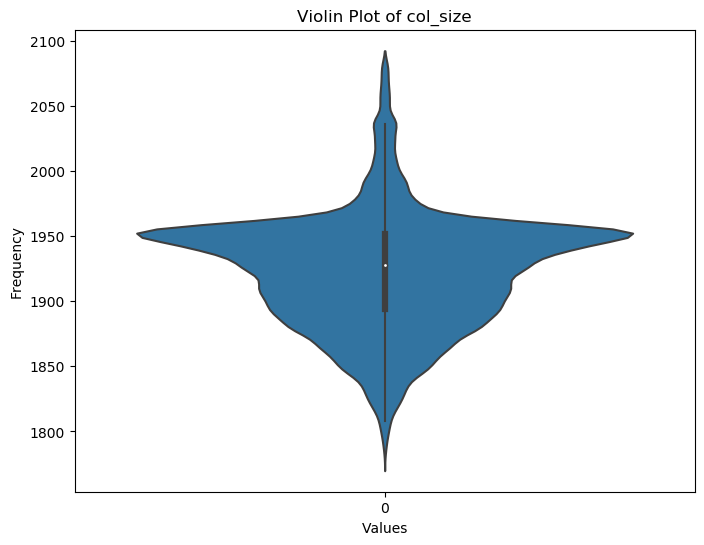

In [196]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=train_metadata[column])
    plt.title(f'Violin Plot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [183]:
train_metadata.columns

Index(['record_id', 'projection_wkt', 'row_min', 'row_size', 'col_min',
       'col_size', 'timestamp', 'proj', 'zone', 'datum', 'units', 'no_defs',
       'type'],
      dtype='object')

In [ ]:
s = sns.pairplot(train_metadata[ft],
                 plot_kws={'alpha' : 0.2, 'color' : palette[2]},
                 diag_kws={'color' : palette[2]})
s.fig.suptitle(f'Pair Plot for the train metadata file',
               fontweight='bold', fontsize=20, y=1.03);

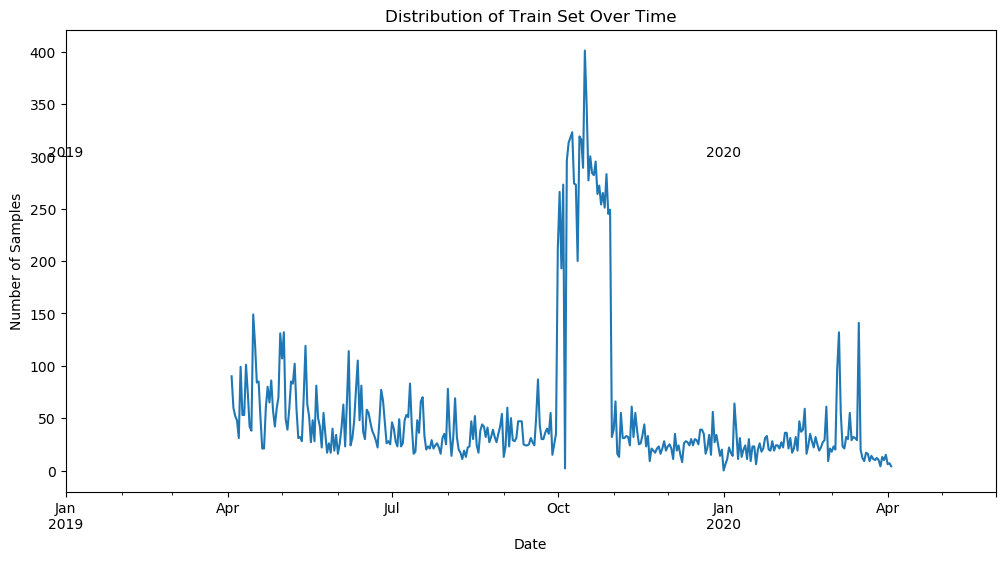

In [174]:
import matplotlib.pyplot as plt

# Load the train metadata
train_metadata = pd.read_json(BASE_DIR / "train_metadata.json")

# Convert the timestamp column to datetime format
train_metadata['timestamp'] = pd.to_datetime(train_metadata['timestamp'], unit='s')

# Set the timestamp column as the index
train_metadata.set_index('timestamp', inplace=True)

# Plot the distribution over time
plt.figure(figsize=(12, 6))
train_metadata.resample('D').size().plot()
plt.xlabel('Date')
plt.ylabel('Number of Samples')
plt.title('Distribution of Train Set Over Time')

# Add labels for the years
plt.text(pd.Timestamp('2019-01-01'), 300, '2019', ha='center')
plt.text(pd.Timestamp('2020-01-01'), 300, '2020', ha='center')

# Adjust x-axis limits to include the entire year 2019
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2020-05-31'))

plt.show()

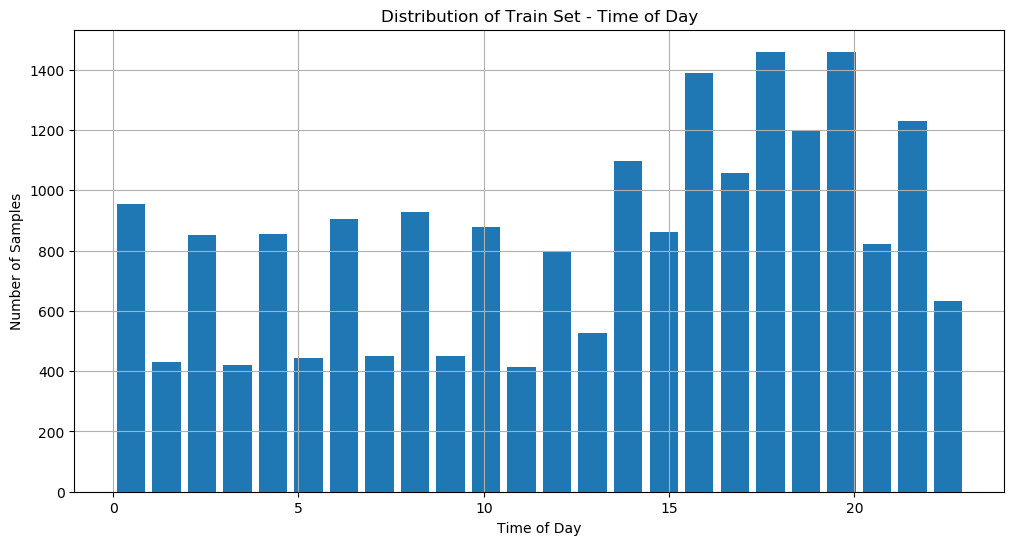

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the train metadata
train_metadata = pd.read_json(BASE_DIR / "train_metadata.json")

# Convert the timestamp column to datetime format
train_metadata['timestamp'] = pd.to_datetime(train_metadata['timestamp'], unit='s')

# Extract the hour component from the timestamp
train_metadata['hour'] = train_metadata['timestamp'].dt.hour

# Plot the distribution of samples based on time of day
plt.figure(figsize=(12, 6))
train_metadata['hour'].hist(bins=24, rwidth=0.8)
plt.xlabel('Time of Day')
plt.ylabel('Number of Samples')
plt.title('Distribution of Train Set - Time of Day')

plt.show()


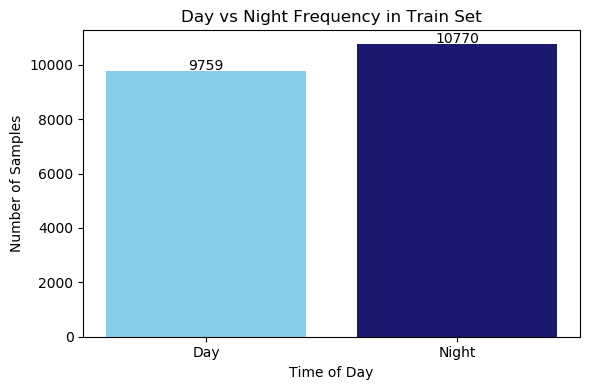

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the train metadata
train_metadata = pd.read_json(BASE_DIR / "train_metadata.json")

# Convert the timestamp column to datetime format
train_metadata['timestamp'] = pd.to_datetime(train_metadata['timestamp'], unit='s')

# Extract the hour component from the timestamp
train_metadata['hour'] = train_metadata['timestamp'].dt.hour

# Count the number of daytime and nighttime samples
day_count = train_metadata[train_metadata['hour'].between(6, 17)].shape[0]  # 6 AM to 5 PM
night_count = train_metadata[~train_metadata['hour'].between(6, 17)].shape[0]  # 6 PM to 5 AM

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Day', 'Night'], [day_count, night_count], color=['skyblue', 'midnightblue'])
plt.xlabel('Time of Day')
plt.ylabel('Number of Samples')
plt.title('Day vs Night Frequency in Train Set')

# Set y-axis limits
plt.ylim([0, max(day_count, night_count) + 500])

# Add labels to the bars
plt.text(0, day_count + 50, str(day_count), ha='center')
plt.text(1, night_count + 50, str(night_count), ha='center')

plt.tight_layout()
plt.show()


In [114]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 43.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 35.0 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.0 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: click
    Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


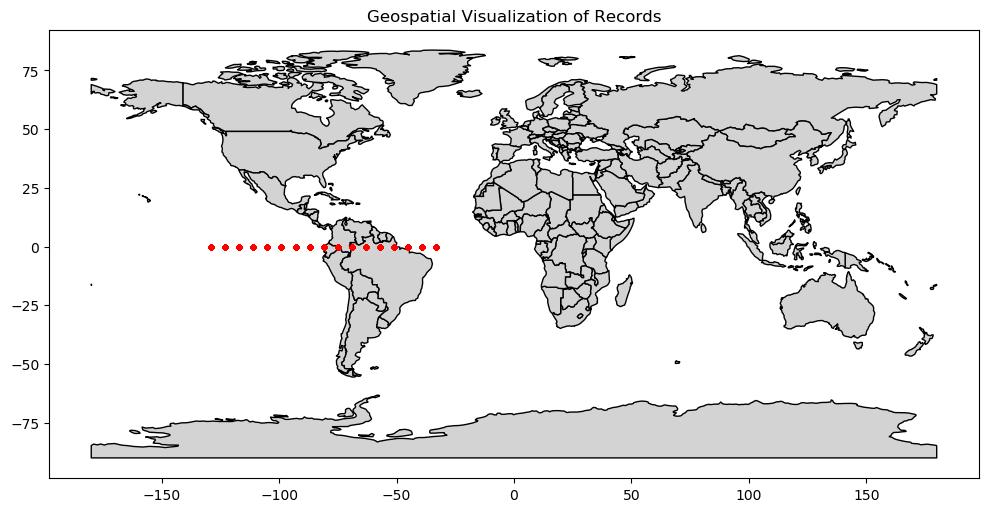

In [122]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings

# Suppress ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Extracting latitude and longitude from the projection_wkt column
train_metadata['latitude'] = train_metadata['projection_wkt'].apply(lambda x: float(x.split('PARAMETER["latitude_of_origin",')[1].split(']')[0]))
train_metadata['longitude'] = train_metadata['projection_wkt'].apply(lambda x: float(x.split('PARAMETER["central_meridian",')[1].split(']')[0]))

# Creating a GeoDataFrame with the extracted coordinates
geometry = gpd.points_from_xy(train_metadata.longitude, train_metadata.latitude)
crs = 'EPSG:4326' # Assuming the coordinates are in WGS84

gdf = gpd.GeoDataFrame(train_metadata, crs=crs, geometry=geometry)

# Plotting the records on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.title('Geospatial Visualization of Records')
plt.show()

In [121]:
import pandas as pd

# Check if all 'latitude_of_origin' values in 'projection_wkt' column are 0
is_all_zero = train_metadata['projection_wkt'].str.contains(r'latitude_of_origin,0').all()

print(is_all_zero)


False


##### Observing that the metadata consists of:
- record_id: 19 digit record IDs
- projection_wkt: coordinate reference system (CRS)    
    - PROJCS: the name of the CRS
    - GEOGCS: name of the geographic CRS
-  DATUM: the datum used in the geographic coordinate system. For example:
   - Name: "WGS_1984" (World Geodetic System 1984).   
   - SPHEROID: Describes the shape of the Earth.
   - Semimajor axis: 6378137 meters.
   - Inverse flattening: 298.257223563.
   - AUTHORITY: Identifies the organization that defined the parameters (EPSG code 7030).
   - AUTHORITY: Identifies the organization that defined the datum (EPSG code 6326).
   - PRIMEM: Specifies the prime meridian.
   - Name: "Greenwich".
   - Longitude: 0 degrees.
   - AUTHORITY: Identifies the organization that defined the prime meridian (EPSG code 8901).
   - UNIT: Defines the units of measurement for the CRS.
   - Name: "degree".
   - Conversion factor: 0.0174532925199433 (to convert degrees to radians).
   - AUTHORITY: Identifies the organization that defined the unit (EPSG code 9122).
   - PROJECTION: Indicates the projection method used.:
      - Name: "Transverse_Mercator" (Transverse Mercator projection).
  - PARAMETER: Specifies the projection parameters.
    - latitude_of_origin: 0 degrees.
    - central_meridian: -51 degrees.
    - scale_factor: 0.9996.
    - false_easting: 500000 meters.
    - false_northing: 0 meters.
   - UNIT: Defines the units of measurement for the CRS.
      - Name: "metre".
      - Conversion factor: 1 (meter is the base unit).
      - AUTHORITY: Identifies the organization that defined the unit (EPSG code 9001).
      - AXIS: Defines the orientation of the coordinate axes.
      - Name: "Easting" (horizontal axis).
      - Direction: EAST.
      - AXIS: "Northing" (vertical axis)
      - Direction: NORTH

In [108]:
print(train_metadata.isnull().sum())

record_id         0
projection_wkt    0
row_min           0
row_size          0
col_min           0
col_size          0
timestamp         0
dtype: int64


In [23]:
val_metadata.head()

,record_id,projection_wkt,row_min,row_size,col_min,col_size,timestamp
0,2243486080767052544,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",2.686377e+06,-1984.932129,466287.28125,1929.760986,2020-03-12 02:40:00
1,1350397700256572928,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",4.689728e+06,-2032.869629,490451.56250,1894.080933,2019-10-02 04:40:00
2,8505075235373322240,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",1.685851e+06,-1957.424438,323984.40625,1950.255371,2019-07-28 13:20:00
3,3748274471002213376,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",-3.047325e+05,-1949.351440,206977.18750,1954.273804,2019-11-06 09:20:00
4,7352564579115799552,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",2.190362e+06,-1988.336914,577635.12500,1926.263672,2019-10-27 00:00:00


In [177]:
pos_examples = 0

for example in tqdm(train_list):
    im = np.load(f"contrails_project/train/{example}/human_pixel_masks.npy")
    if len(np.unique(im)) > 1:
        pos_examples += 1

print(f"positive examples: {pos_examples}, neg_examples: {len(train_list) - pos_examples}")

100%|██████████| 20529/20529 [03:56<00:00, 86.76it/s]

positive examples: 9259, neg_examples: 11270


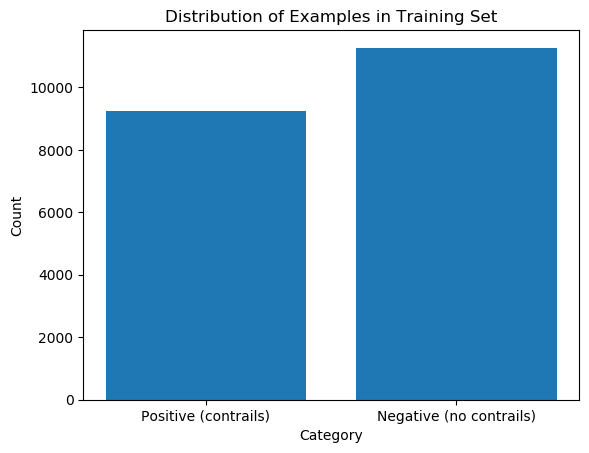

In [178]:
pos_examples = 9259
neg_examples = len(train_list) - pos_examples

categories = ['Positive (contrails)', 'Negative (no contrails)']
counts = [pos_examples, neg_examples]

plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Examples in Training Set')
plt.show()

In [180]:
pos_examples = 0

for example in tqdm(val_list):
    im = np.load(f"contrails_project/validation/{example}/human_pixel_masks.npy")
    if len(np.unique(im)) > 1:
        pos_examples += 1

print(f"positive examples: {pos_examples}, neg_examples: {len(val_list) - pos_examples}")

100%|██████████| 1856/1856 [00:22<00:00, 83.92it/s]

positive examples: 552, neg_examples: 1304


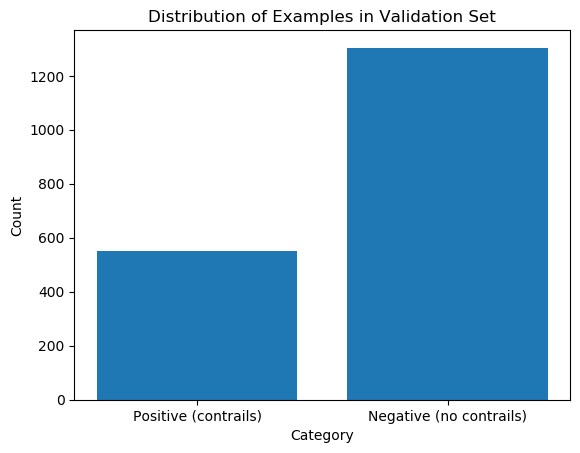

In [197]:
pos_examples = 552
neg_examples = len(val_list) - pos_examples

categories = ['Positive (contrails)', 'Negative (no contrails)']
counts = [pos_examples, neg_examples]

plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Examples in Validation Set')
plt.show()

In [27]:
example = train_list[0]  # Choose one example image

im = np.load(f"contrails_project/train/{example}/human_pixel_masks.npy")
total_pixels = im.size
positive_pixels = np.count_nonzero(im)

percentage_positive = (positive_pixels / total_pixels) * 100

print(f"Example: {example}")
print(f"Number of positive pixels: {positive_pixels}")
print(f"Number of total pixels: {total_pixels}")
print(f"Percentage of positive pixels: {percentage_positive:.2f}%")

Example: 3742625928820706351
Number of positive pixels: 0
Number of total pixels: 65536
Percentage of positive pixels: 0.00%


In [30]:
example = None
positive_pixels = 0
total_pixels = 0

for image_name in train_list:
    im = np.load(f"contrails_project/train/{image_name}/human_pixel_masks.npy")
    if np.any(im):
        example = image_name
        positive_pixels = np.count_nonzero(im)
        total_pixels = im.size
        break

if example is not None:
    percentage_positive = (positive_pixels / total_pixels) * 100
    print(f"Example: {example}")
    print(f"Number of positive pixels: {positive_pixels}")
    print(f"Number of total pixels: {total_pixels}")
    print(f"Percentage of positive pixels: {percentage_positive:.2f}%")
else:
    print("No example with at least one positive pixel found.")

Example: 4720754150733663935
Number of positive pixels: 426
Number of total pixels: 65536
Percentage of positive pixels: 0.65%


In [31]:
positive_percentages = []

for image_name in train_list:
    im = np.load(f"contrails_project/train/{image_name}/human_pixel_masks.npy")
    if np.any(im):
        positive_pixels = np.count_nonzero(im)
        total_pixels = im.size
        percentage_positive = (positive_pixels / total_pixels) * 100
        positive_percentages.append(percentage_positive)

mean_percentage = np.mean(positive_percentages)
mode_percentage = np.argmax(np.bincount(positive_percentages))
median_percentage = np.median(positive_percentages)

print(f"Mean percentage of positive pixels: {mean_percentage:.2f}%")
print(f"Mode percentage of positive pixels: {mode_percentage:.2f}%")
print(f"Median percentage of positive pixels: {median_percentage:.2f}%")

Mean percentage of positive pixels: 1.18%
Mode percentage of positive pixels: 0.00%
Median percentage of positive pixels: 0.62%


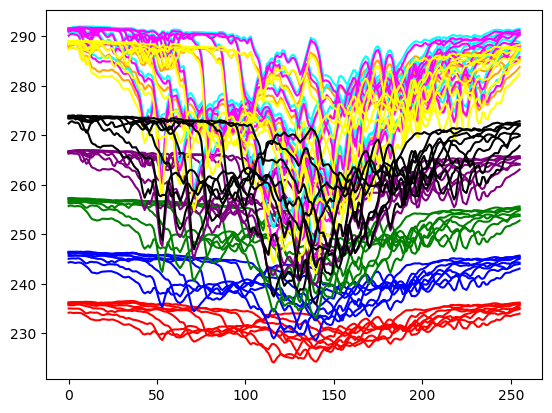

In [39]:
plt.ioff()  # Disable interactive mode
bands = ['08', '09', '10', '11', '12', '13', '14', '15', '16']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black']

for i, band in enumerate(bands):
    plot = np.load(f'contrails_project/train/4720754150733663935/band_{band}.npy')
    plt.plot(plot[0], color=colors[i], label=f'Band {band}')

plt.show()  # Show the plots

Some bands definitions:

11: "Cloud-Top Phase" Band (8.5)
14: IR Longwave Window Band (11.2)
15: "Dirty" Longwave Window Band (12.3)

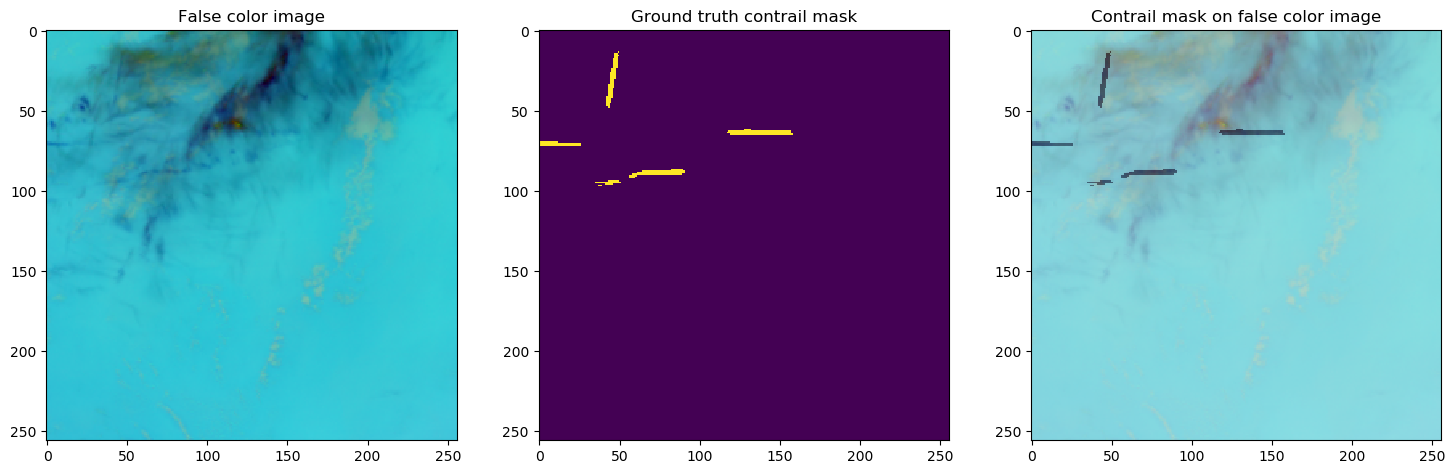

In [132]:
import os
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython import display

N_TIMES_BEFORE = 4
record_id = '4720754150733663935'

with open(os.path.join(BASE_DIR, 'train', record_id, 'band_11.npy'), 'rb') as f:
    band11 = np.load(f)
with open(os.path.join(BASE_DIR, 'train',  record_id, 'band_14.npy'), 'rb') as f:
    band14 = np.load(f)
with open(os.path.join(BASE_DIR, 'train', record_id, 'band_15.npy'), 'rb') as f:
    band15 = np.load(f)
with open(os.path.join(BASE_DIR, 'train', record_id, 'human_pixel_masks.npy'), 'rb') as f:
    human_pixel_mask = np.load(f)
with open(os.path.join(BASE_DIR, 'train', record_id, 'human_individual_masks.npy'), 'rb') as f:
    human_individual_mask = np.load(f)

_T11_BOUNDS = (243, 303)
_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
_TDIFF_BOUNDS = (-4, 2)

def normalize_range(data, bounds):
    """Maps data to the range [0, 1]."""
    return (data - bounds[0]) / (bounds[1] - bounds[0])

r = normalize_range(band15 - band14, _TDIFF_BOUNDS)
g = normalize_range(band14 - band11, _CLOUD_TOP_TDIFF_BOUNDS)
b = normalize_range(band14, _T11_BOUNDS)
false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)

img = false_color[..., N_TIMES_BEFORE]

plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('False color image')

ax = plt.subplot(1, 3, 2)
ax.imshow(np.squeeze(human_pixel_mask), interpolation='none')
ax.set_title('Ground truth contrail mask')

ax = plt.subplot(1, 3, 3)
ax.imshow(img)
ax.imshow(np.squeeze(human_pixel_mask), cmap='Reds', alpha=.4, interpolation='none')
ax.set_title('Contrail mask on false color image')

plt.show()


In [73]:
n = human_individual_mask.shape[-1]
plt.figure(figsize=(16, 4))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(np.squeeze(human_individual_mask[..., i]), interpolation='none')



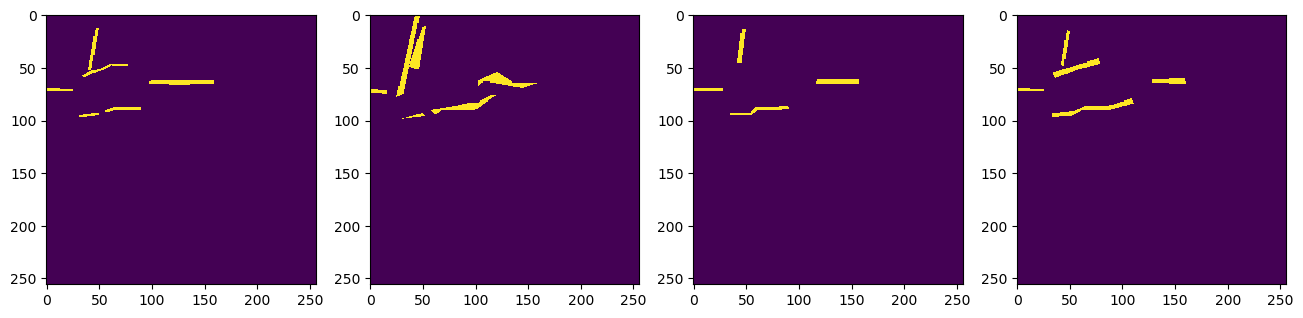

In [74]:
plt.show()

In [75]:
# Animation
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(false_color[..., 0])
def draw(i):
    im.set_array(false_color[..., i])
    return [im]
anim = animation.FuncAnimation(
    fig, draw, frames=false_color.shape[-1], interval=500, blit=True
)
plt.close()
display.HTML(anim.to_jshtml())

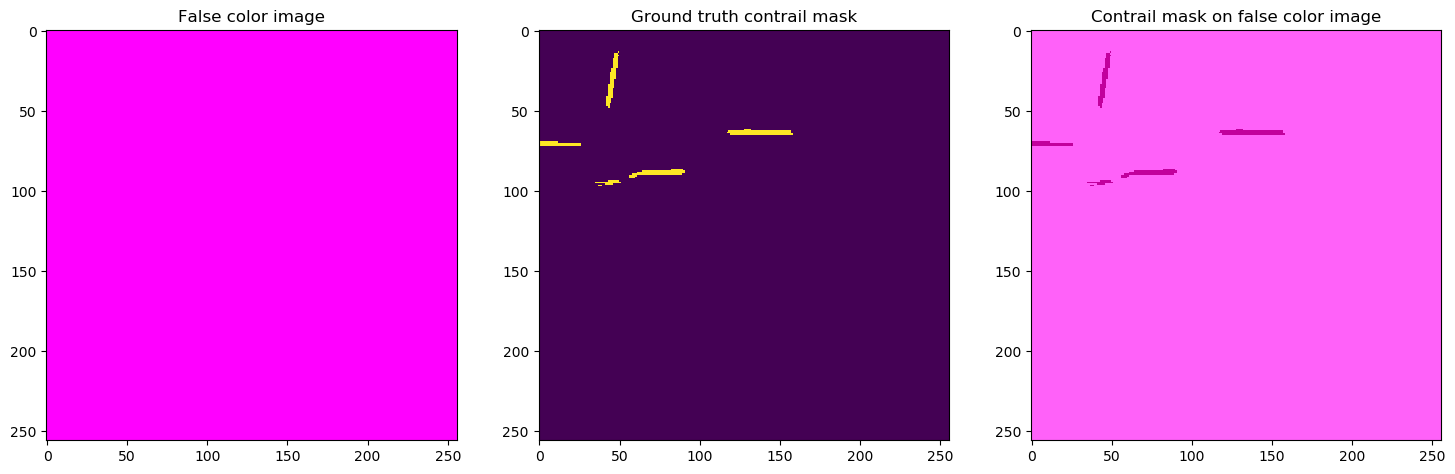

In [138]:
import os
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython import display

N_TIMES_BEFORE = 3
record_id = '4720754150733663935'

with open(os.path.join(BASE_DIR, 'train', record_id, 'band_11.npy'), 'rb') as f:
    band11 = np.load(f)
with open(os.path.join(BASE_DIR, 'train',  record_id, 'band_12.npy'), 'rb') as f:
    band12 = np.load(f)
with open(os.path.join(BASE_DIR, 'train', record_id, 'band_08.npy'), 'rb') as f:
    band8 = np.load(f)
with open(os.path.join(BASE_DIR, 'train', record_id, 'human_pixel_masks.npy'), 'rb') as f:
    human_pixel_mask = np.load(f)
with open(os.path.join(BASE_DIR, 'train', record_id, 'human_individual_masks.npy'), 'rb') as f:
    human_individual_mask = np.load(f)

#_T11_BOUNDS = (243, 303)
#_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
#_TDIFF_BOUNDS = (-4, 2)

# def normalize_range(data, bounds):
#     """Maps data to the range [0, 1]."""
#     return (data - bounds[0]) / (bounds[1] - bounds[0])

r = band12
g = band12 - band11
b = band11- band8
false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)

img = false_color[..., N_TIMES_BEFORE]

plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('False color image')

ax = plt.subplot(1, 3, 2)
ax.imshow(np.squeeze(human_pixel_mask), interpolation='none')
ax.set_title('Ground truth contrail mask')

ax = plt.subplot(1, 3, 3)
ax.imshow(img)
ax.imshow(np.squeeze(human_pixel_mask), cmap='Reds', alpha=.4, interpolation='none')
ax.set_title('Contrail mask on false color image')

plt.show()


band_{08-16}.npy: array with size of H x W x T, where T = n_times_before + n_times_after + 1, representing the number of images in the sequence. There are n_times_before and n_times_after images before and after the labeled frame respectively. 

In our dataset all examples have n_times_before=4 and n_times_after=3. Each band represents an infrared channel at different wavelengths and is converted to brightness temperatures based on the calibration parameters. The number in the filename corresponds to the GOES-16 ABI band number. 

human_individual_masks.npy: array with size of H x W x 1 x R. Each example is labeled by R individual human labelers. R is not the same for all samples. The labeled masks have value either 0 or 1 and correspond to the (n_timesbefore+1)-th image in band{08-16}.npy. They are available only in the training set.

human_pixel_masks.npy: array with size of H x W x 1 containing the binary ground truth. A pixel is regarded as contrail pixel in evaluation if it is labeled as contrail by more than half of the labelers.

In [175]:
def plot_example(example_id, split_dir):
    """
    Args: 
        example_id(str): The id of the example i.e. '1000216489776414077'
        split_dir(str): The split directoryu i.e. 'test', 'train', 'val'
    """
    fig, axs = plt.subplots(8, len(bands), figsize=(16, 16)) 

    for j, band in enumerate(bands):
        img = np.load(BASE_DIR + f"/{split_dir}/{example_id}/band_{band}.npy")
        for i in range(8):
            axs[i, j].imshow(img[..., i]) 
            axs[i, j].set_title(f"Band {band}\nTime Step {i+1}") 

    plt.tight_layout()  
    plt.show()
    
plot_example('1000603527582775543', 'train')

TypeError: unsupported operand type(s) for +: 'PosixPath' and 'str'